In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.shape

(506, 14)

In [7]:
# Impute the null values with the mean value of their respective columns

df.fillna(df.mean(), inplace=True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

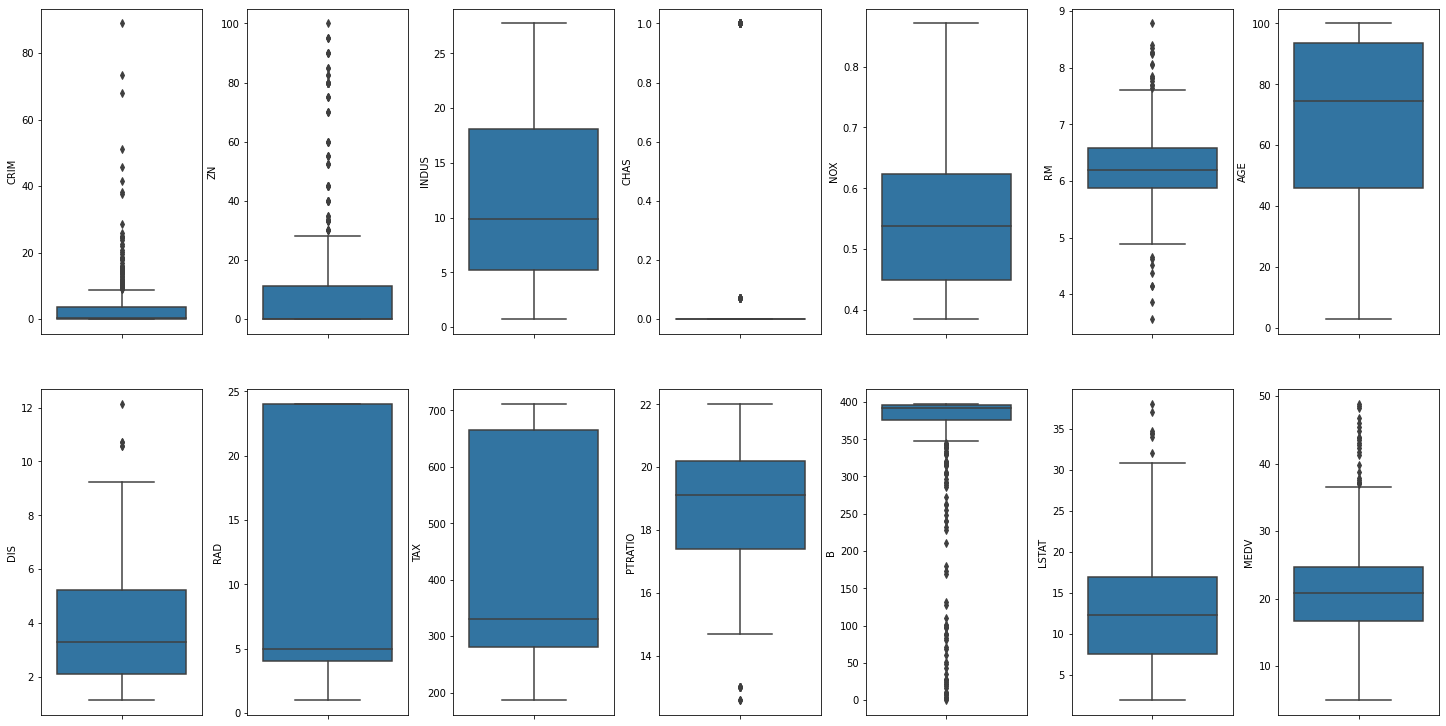

In [17]:
from scipy import stats
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v, in df.items():
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Here, we can observe that there are many outliers in the following features:
*  CRIM
*  ZN
*  CHAS
*  B

Also, from our previous observations we can see that, even the MEDV value too has an outlier at around 50.

In [10]:
#  Cleaning up the outlier in the MEDV column
df = df[~(df['MEDV']>=50)]

In [12]:
# Check the new shape of the dataframe
df.shape

(490, 14)

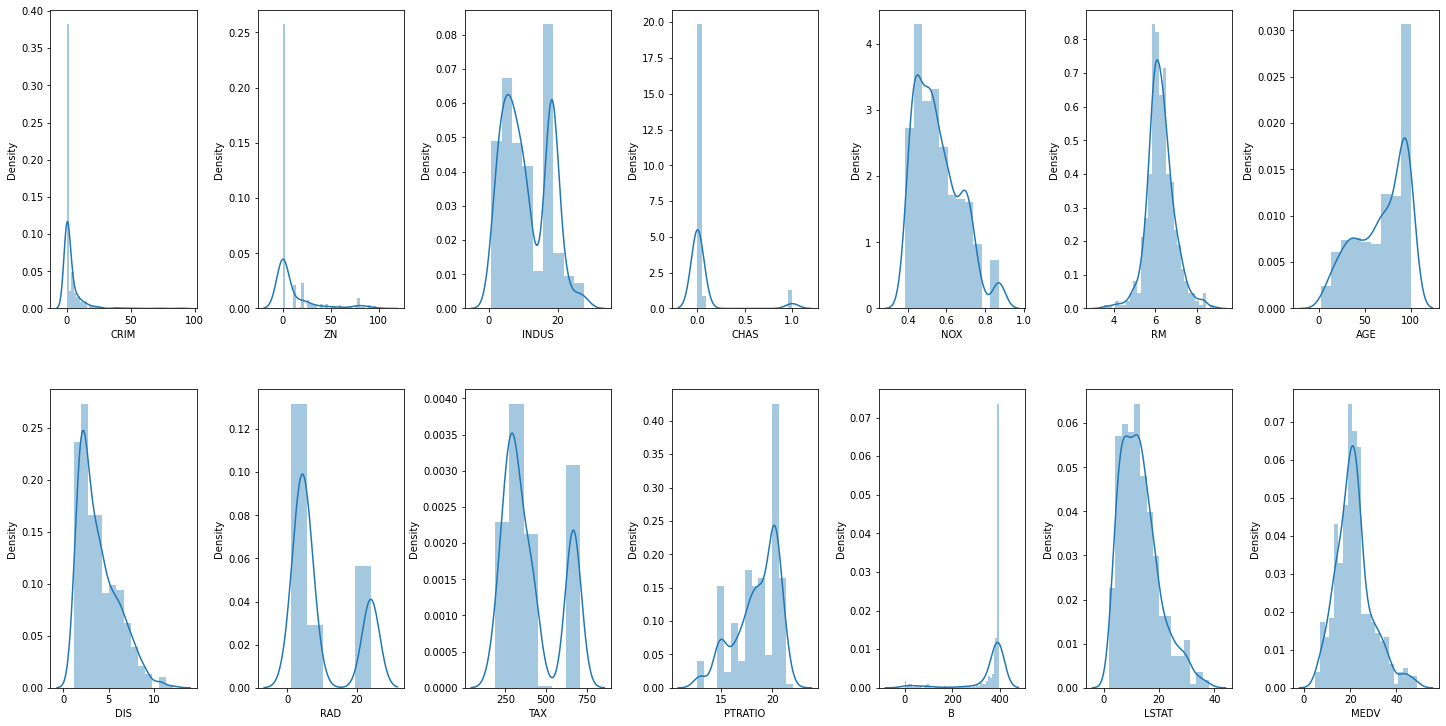

In [16]:
import warnings
warnings.filterwarnings("ignore")
# Distribution plot for all the features in the dataframe 

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

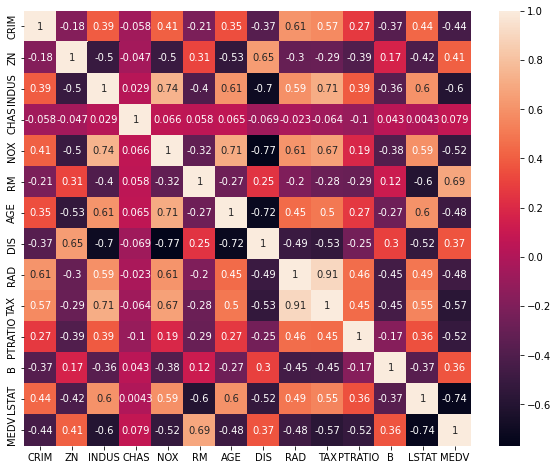

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

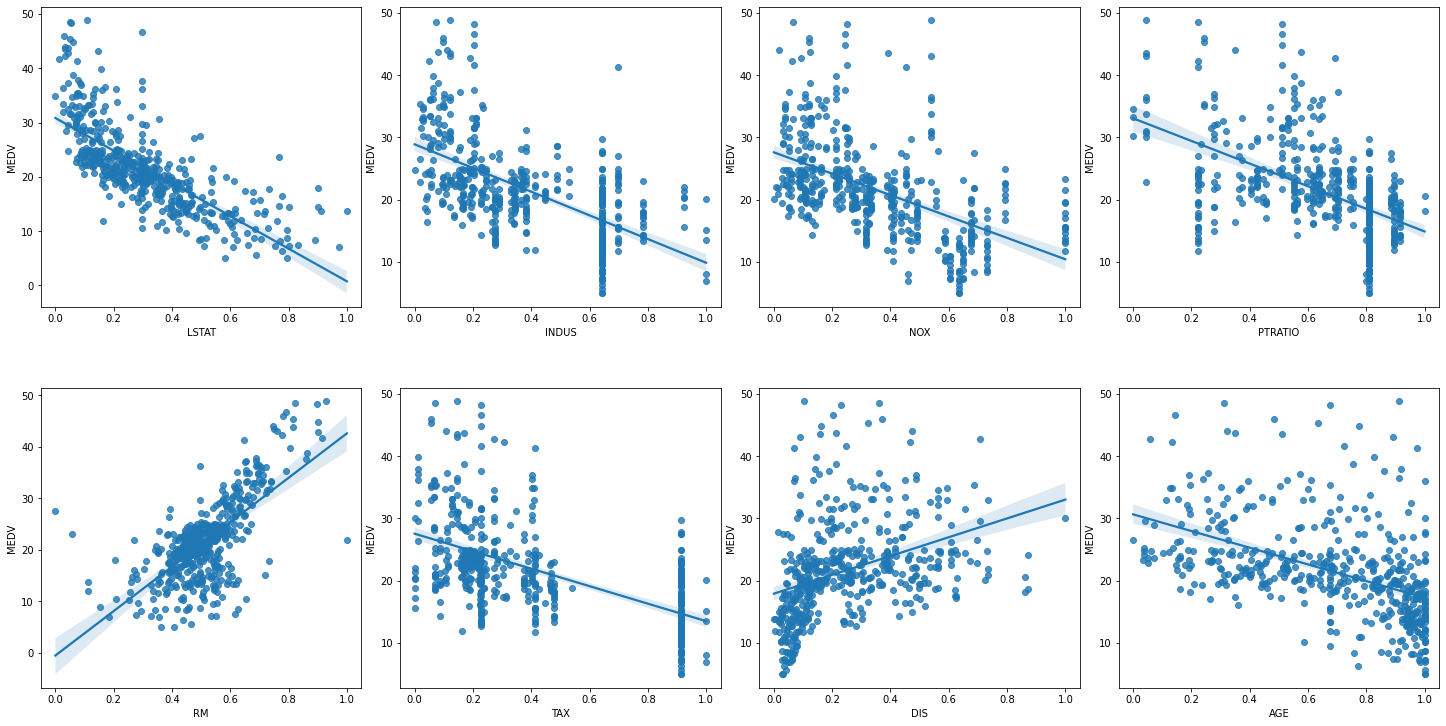

In [22]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_selected = ['LSTAT', 'INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE'] 
x = df.loc[:,column_selected]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_selected)

# Plot the taget variable with other mentioned columns
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for v,k in enumerate(column_selected):
  sns.regplot(y=y, x=x[k], ax=axs[v])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [23]:
x = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=2)

In [28]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
xgb = XGBRegressor() 
xgb.fit(x_train,y_train)


[03:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [29]:
training_predict = xgb.predict(x_train)
training_predict

array([16.588373 , 10.536695 , 21.049538 , 19.407188 , 19.984425 ,
       23.386377 , 20.127941 , 18.220997 , 31.011122 , 10.717628 ,
       21.649189 , 18.749493 , 21.804695 , 19.281704 , 19.939829 ,
       13.589946 , 21.067432 , 21.36252  , 20.22925  , 19.04003  ,
       20.523014 , 17.956425 ,  8.826831 ,  8.451239 , 25.063908 ,
        8.609225 , 14.382143 , 21.409704 ,  9.409441 , 25.207378 ,
       43.197083 , 27.465841 , 25.996273 , 24.427307 , 15.988843 ,
       17.974712 , 21.86498  , 16.286394 , 13.792159 ,  7.8120766,
       17.64209  , 19.614124 , 17.614004 , 19.312365 , 26.259705 ,
       23.307009 , 21.921133 , 21.28157  , 21.072216 , 27.12223  ,
       14.359555 , 23.421976 , 20.487982 , 20.406347 , 22.184973 ,
       14.411949 , 19.716448 , 14.627697 , 20.763988 , 22.014322 ,
       21.249521 , 10.376223 , 20.888666 ,  9.669664 , 31.182714 ,
       33.990547 , 24.935518 , 21.7621   ,  9.01583  , 15.61965  ,
       22.466642 , 13.237157 , 18.431173 , 24.45855  , 22.5190

In [33]:
# Import error metrics 
from sklearn import metrics 

# R squared error
r_sq = metrics.r2_score(y_train, training_predict)

m_ab_error = metrics.mean_absolute_error(y_train, training_predict)

print('R Squared error value: ', r_sq)
print('Mean Absolute error value: ', m_ab_error)


R Squared error value:  0.9651460732177461
Mean Absolute error value:  1.098244791614766


In [ ]:
test_predict = xgb.predict(x_test)
test_predict

In [40]:
# Error metrics for test data
# R squared error 
r_sq_test = metrics.r2_score(y_test, test_predict)

# Mean absolute error
m_ab_error_test = metrics.mean_absolute_error(y_test, test_predict)

print('R Squared error value: ', r_sq_test)
print('Mean Absolute error value: ', m_ab_error_test)

R Squared error value:  0.8973118420624472
Mean Absolute error value:  1.9319195659793156


 Nilai R squared (r2_score) berkisar antara 0 sampai 1 yang 
mengindikasikan besarnya kombinasi variabel independen secara bersama –
sama mempengaruhi nilai variabel dependen. Semakin mendekati angka 
satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.
Bad model: R2 will be close to 0.


* Bad model: R2 will be close to 0.
* Good model: R2 will be close to 1 


In [36]:
#  Regression Score of the model
print('Score For Train Data : {}'.format(xgb.score(x_train,y_train)))
print('Score For Test Data : {}'.format(xgb.score(x_test,y_test)))

Score For Train Data : 0.9651460732177461
Score For Test Data : 0.8973118420624472


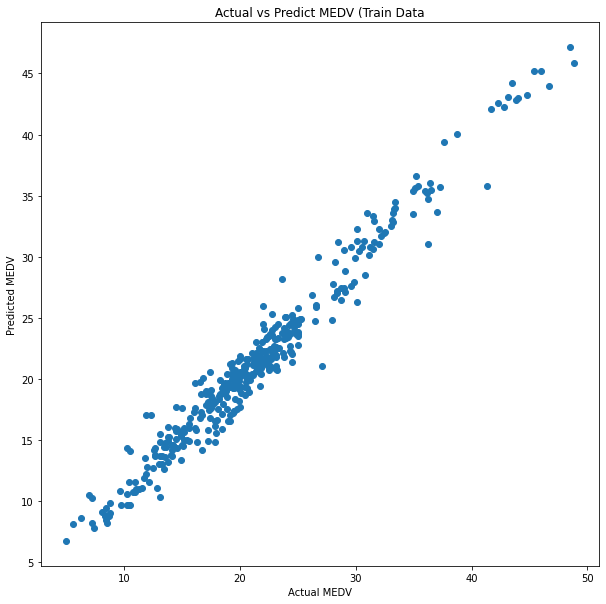

In [39]:
plt.figure(figsize=(10,10))
plt.title("Actual vs Predict MEDV (Train Data")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_train, training_predict)

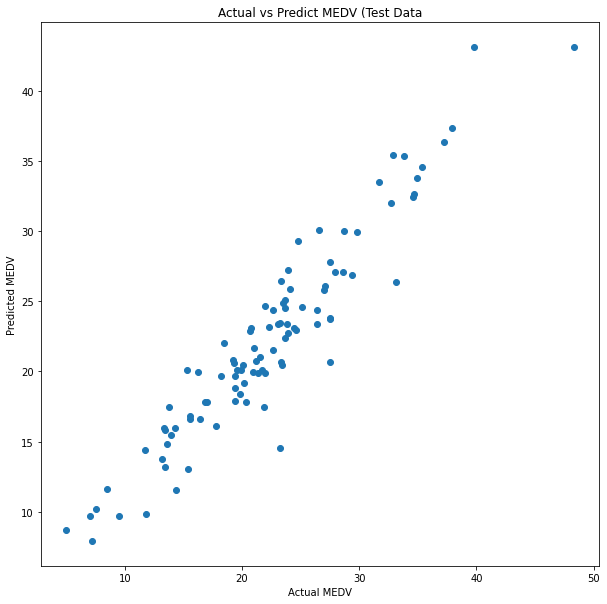

In [41]:
plt.figure(figsize=(10,10))
plt.title("Actual vs Predict MEDV (Test Data")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_test, test_predict)